In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df_low = pd.read_csv(r'Data\Toxic Comment Classification Challenge\train.csv')
train_df_high = pd.read_csv(r'Data\Jigsaw Unintended Bias in Toxicity Classification\train.csv')

In [3]:
train_df_low.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
train_df_high.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [6]:
train_df_high.columns

Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')

In [7]:
train_df_low.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

# Data Balance

dist :  [144277  15294]


<BarContainer object of 2 artists>

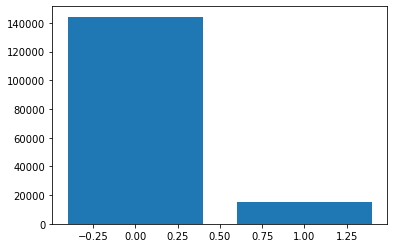

In [28]:
target = train_df_low["toxic"].values
uniq, count = np.unique(target, return_counts=True)
print("dist : ",count)
plt.bar(uniq, count)

dist :  [1698436  106438]


<BarContainer object of 2 artists>

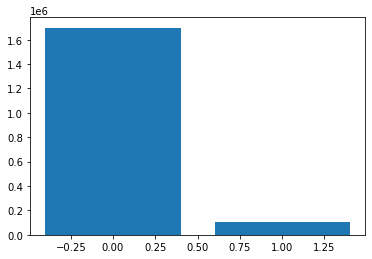

In [30]:
target = train_df_high["target"].values
target = np.where(target>0.5, 1, 0)
uniq, count = np.unique(target, return_counts=True)
print("dist : ",count)
plt.bar(uniq, count)

 # Text Lengt 

(array([91764., 34257., 13551.,  6734.,  4178.,  2448.,  1583.,  1022.,
          708.,   492.,   394.,   342.,   301.,   268.,   255.,   235.,
          209.,   188.,   241.,   401.]),
 array([   6. ,  255.7,  505.4,  755.1, 1004.8, 1254.5, 1504.2, 1753.9,
        2003.6, 2253.3, 2503. , 2752.7, 3002.4, 3252.1, 3501.8, 3751.5,
        4001.2, 4250.9, 4500.6, 4750.3, 5000. ]),
 <a list of 20 Patch objects>)

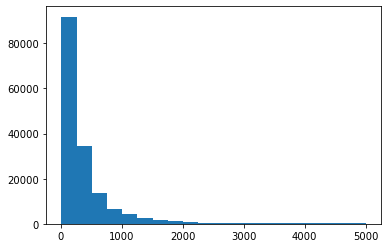

In [36]:
lengt = train_df_low["comment_text"].str.len()
plt.hist(lengt, bins=20)

{'whiskers': [<matplotlib.lines.Line2D at 0x21db09748d0>,
 'caps': [<matplotlib.lines.Line2D at 0x21db1f18c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x21db0974208>],
 'medians': [<matplotlib.lines.Line2D at 0x21db04c0208>],
 'fliers': [<matplotlib.lines.Line2D at 0x21dabdbb550>],
 'means': []}

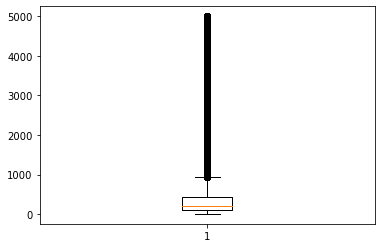

In [37]:
plt.boxplot(lengt)

(array([4.64738e+05, 4.03803e+05, 2.60082e+05, 1.76836e+05, 1.24591e+05,
        8.77340e+04, 6.45860e+04, 4.94480e+04, 4.10800e+04, 4.22770e+04,
        8.96920e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 4.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([1.00000e+00, 9.62500e+01, 1.91500e+02, 2.86750e+02, 3.82000e+02,
        4.77250e+02, 5.72500e+02, 6.67750e+02, 7.63000e+02, 8.58250e+02,
        9.53500e+02, 1.04875e+03, 1.14400e+03, 1.23925e+03, 1.33450e+03,
        1.42975e+03, 1.52500e+03, 1.62025e+03, 1.71550e+03, 1.81075e+03,
        1.90600e+03]),
 <a list of 20 Patch objects>)

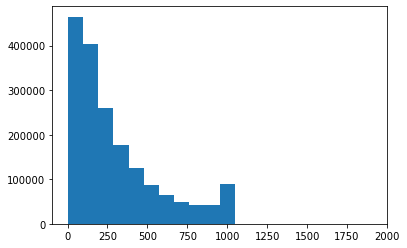

In [38]:
lengt = train_df_high["comment_text"].str.len()
plt.hist(lengt, bins=20)

{'whiskers': [<matplotlib.lines.Line2D at 0x21e06d70400>,
 'caps': [<matplotlib.lines.Line2D at 0x21e06da3588>,
 'boxes': [<matplotlib.lines.Line2D at 0x21e094e6d30>],
 'medians': [<matplotlib.lines.Line2D at 0x21e06da8668>],
 'fliers': [<matplotlib.lines.Line2D at 0x21e06da8e10>],
 'means': []}

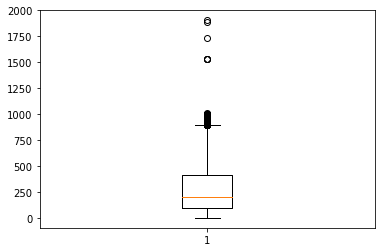

In [39]:
plt.boxplot(lengt)